In [57]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
page = requests.get('https://www.basketball-reference.com/leagues/NBA_2022.html')
soup = BeautifulSoup(page.text, 'html.parser')

In [124]:
d = {}

for i in str(soup).split('\n'):
    if '<caption>' in i:

        cat = ""
        head = ""
        
        
        # get headers
        for k in i.split('</th>'):

            #get specific table type
            if "caption" in k:
                
                try:
                    temp1 = k[k.index('id=')+4:]
                    cat = temp1[:temp1.index('"')]
                except:
                    pass
            
        # get stats
        for j in i.split('</td>'):
            
            if j[-1] == '>':
                try:
                    
                    temp = j[j.index('html">')+6:]
                    temp = temp[:temp.index('<')].strip()
                    
                    if temp not in master_dict:
                        master_dict[temp] = {}
                    row.append(temp)
                        
                except:
                    pass
                
            else:
                
                try:
                    stat = j[j.index('t="')+3:]
                    
                    tempstat = stat[:stat.index('>')-1]
                    
                    if tempstat not in d:
                        d[tempstat] = {}
                        
                    if temp not in d[tempstat]:
                        d[tempstat][temp] = -1
                        
                    try:
                        if d[tempstat][temp] == -1:
                            d[tempstat][temp] = float(j[j.index('">')+2:])
                        
                    except:
                        this = j[j.index('">')+2:]
                        try:
                            if d[tempstat][temp] == -1:
                                d[tempstat][temp] = int(re.sub(',','', this))
                        except:
                            if d[tempstat][temp] == -1:
                                d[tempstat][temp] = this
                        
                        
                except:
                    pass
teams = pd.DataFrame(d)
teams = teams.drop(columns=['ranker" scope="row'])

In [98]:
for i in teams.columns:
    print(i)

g
mp
fg
fga
fg_pct
fg3
fg3a
fg3_pct
fg2
fg2a
fg2_pct
ft
fta
ft_pct
orb
drb
trb
ast
stl
blk
tov
pf
pts
opp_fg
opp_fga
opp_fg_pct
opp_fg3
opp_fg3a
opp_fg3_pct
opp_fg2
opp_fg2a
opp_fg2_pct
opp_ft
opp_fta
opp_ft_pct
opp_orb
opp_drb
opp_trb
opp_ast
opp_stl
opp_blk
opp_tov
opp_pf
opp_pts
age
wins
losses
wins_pyth
losses_pyth
mov
sos
srs
off_rtg
def_rtg
net_rtg
pace
fta_per_fga_pct
fg3a_per_fga_pct
ts_pct
efg_pct
tov_pct
orb_pct
ft_rate
opp_efg_pct
opp_tov_pct
drb_pct
opp_ft_rate
arena_name
attendance
attendance_per_g
avg_dist
pct_fga_fg2a
pct_fga_00_03
pct_fga_03_10
pct_fga_10_16
pct_fga_16_xx
pct_fga_fg3a
fg_pct_fg2a
fg_pct_00_03
fg_pct_03_10
fg_pct_10_16
fg_pct_16_xx
fg_pct_fg3a
pct_ast_fg2
pct_ast_fg3
pct_fga_dunk
fg_dunk
pct_fga_layup
fg_layup
pct_fg3a_corner
fg3_pct_corner
fg3a_heave
fg3_heave
opp_avg_dist
opp_pct_fga_fg2a
opp_pct_fga_00_03
opp_pct_fga_03_10
opp_pct_fga_10_16
opp_pct_fga_16_xx
opp_pct_fga_fg3a
opp_fg_pct_fg2a
opp_fg_pct_00_03
opp_fg_pct_03_10
opp_fg_pct_10_16
opp_fg_pct

In [40]:
x = dict(teams['attendance_per_g'])
{k: v for k, v in sorted(x.items(), reverse=True, key=lambda item: item[1])}

{'Chicago Bulls': 20492.0,
 'Philadelphia 76ers': 20194.0,
 'Miami Heat': 19600.0,
 'Los Angeles Lakers': 18633.0,
 'Utah Jazz': 18306.0,
 'Golden State Warriors': 18064.0,
 'New York Knicks': 17374.0,
 'Milwaukee Bucks': 17341.0,
 'Toronto Raptors': nan,
 'Dallas Mavericks': 19421.0,
 'Portland Trail Blazers': 17502.0,
 'Denver Nuggets': 17026.0,
 'Cleveland Cavaliers': 16731.0,
 'San Antonio Spurs': 16440.0,
 'Brooklyn Nets': 16153.0,
 'Houston Rockets': 15867.0,
 'Minnesota Timberwolves': 15751.0,
 'Atlanta Hawks': 15648.0,
 'New Orleans Pelicans': 15600.0,
 'Charlotte Hornets': 15402.0,
 'Washington Wizards': 15047.0,
 'Los Angeles Clippers': 15040.0,
 'Phoenix Suns': 15010.0,
 'Orlando Magic': 14630.0,
 'Memphis Grizzlies': 14406.0,
 'Boston Celtics': 12771.0,
 'Detroit Pistons': 12740.0,
 'Indiana Pacers': 11980.0,
 'Sacramento Kings': 11871.0,
 'Oklahoma City Thunder': 10753.0}

In [58]:
statistics.mean(teams['fg3'])

12.2

In [116]:
def labeled_scatter(X_axis, Y_axis):
    
    annotations=list(teams.index)
    plt.figure(figsize=(40, 30))
    
    x_mean = np.nanmean(teams[X_axis])
    y_mean = np.nanmean(teams[Y_axis])
    plt.axvline(x=x_mean, color='red', ls='--', lw=3)
    plt.axhline(y=y_mean, color='blue', ls='--', lw=3)
    
    plt.scatter(teams[X_axis],teams[Y_axis],s=200, alpha=.6)
    
    plt.xlabel(X_axis, fontsize=30)
    plt.ylabel(Y_axis, fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(Y_axis + ' vs ' + X_axis + " for all NBA teams",fontsize=35)
    
    for i, label in enumerate(annotations):
        plt.annotate(label, (teams[X_axis][i], teams[Y_axis][i]), fontsize=27)

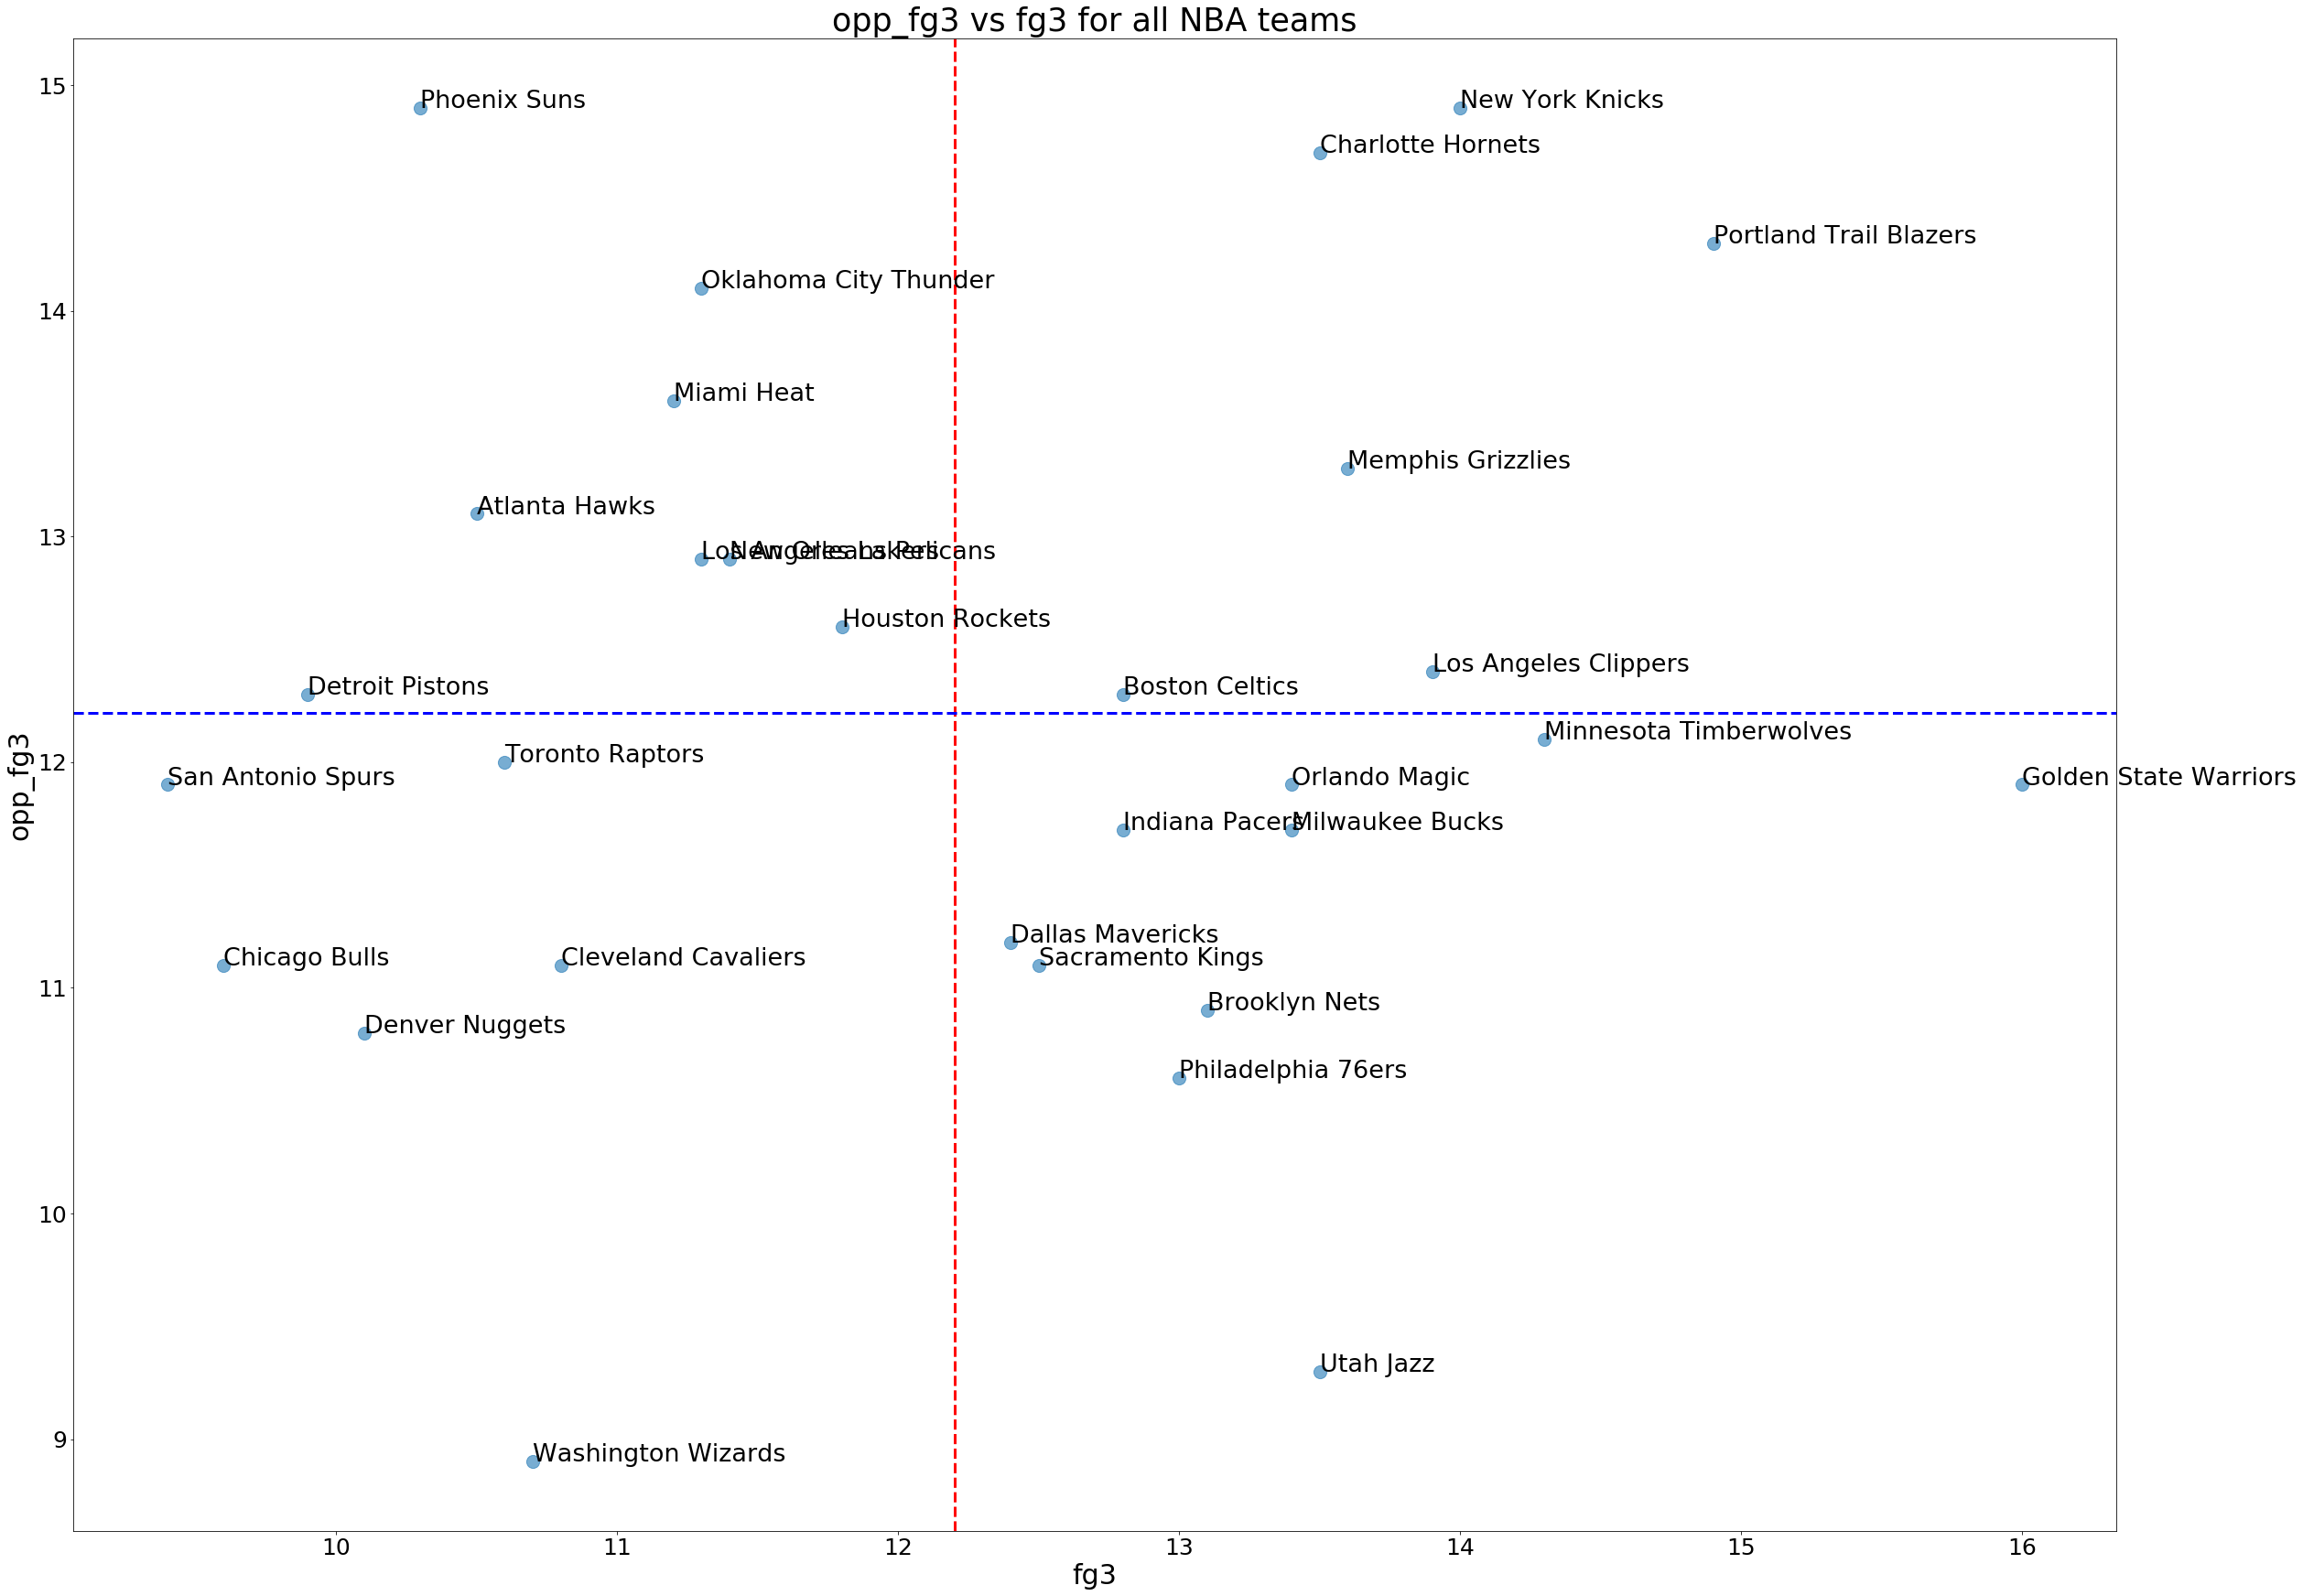

In [117]:
labeled_scatter('fg3', 'opp_fg3')

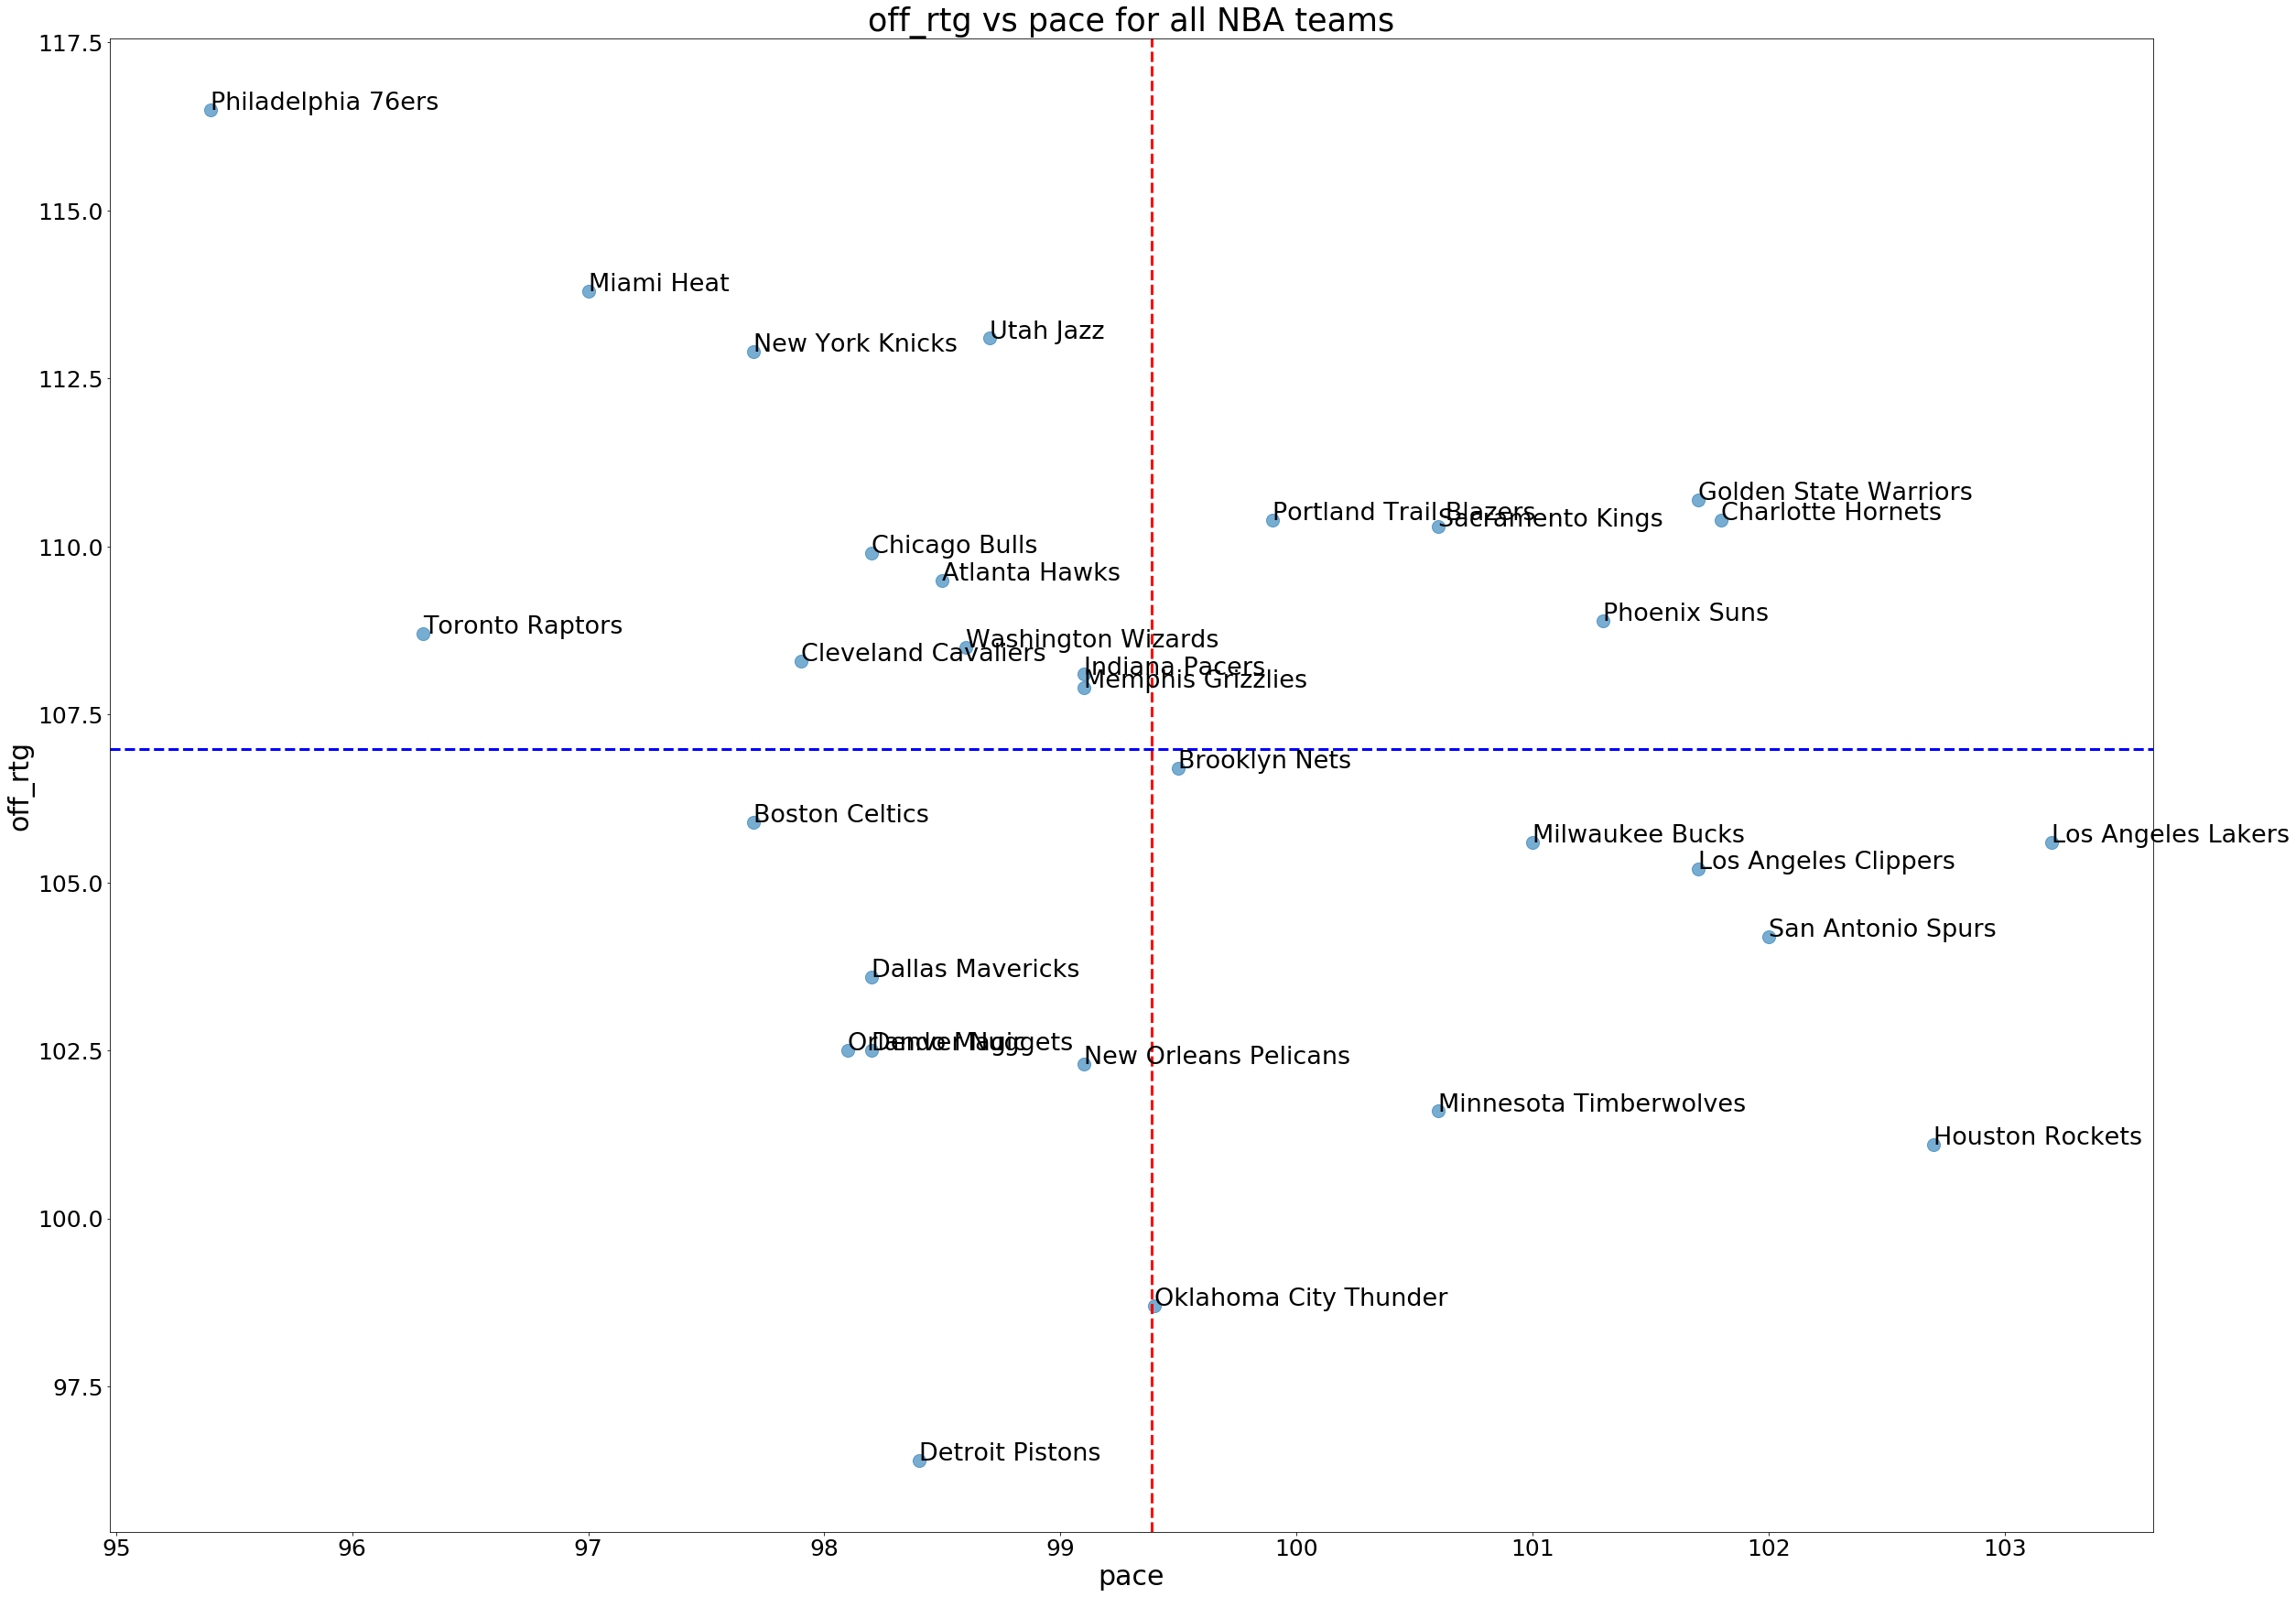

In [118]:
labeled_scatter('pace', 'off_rtg')

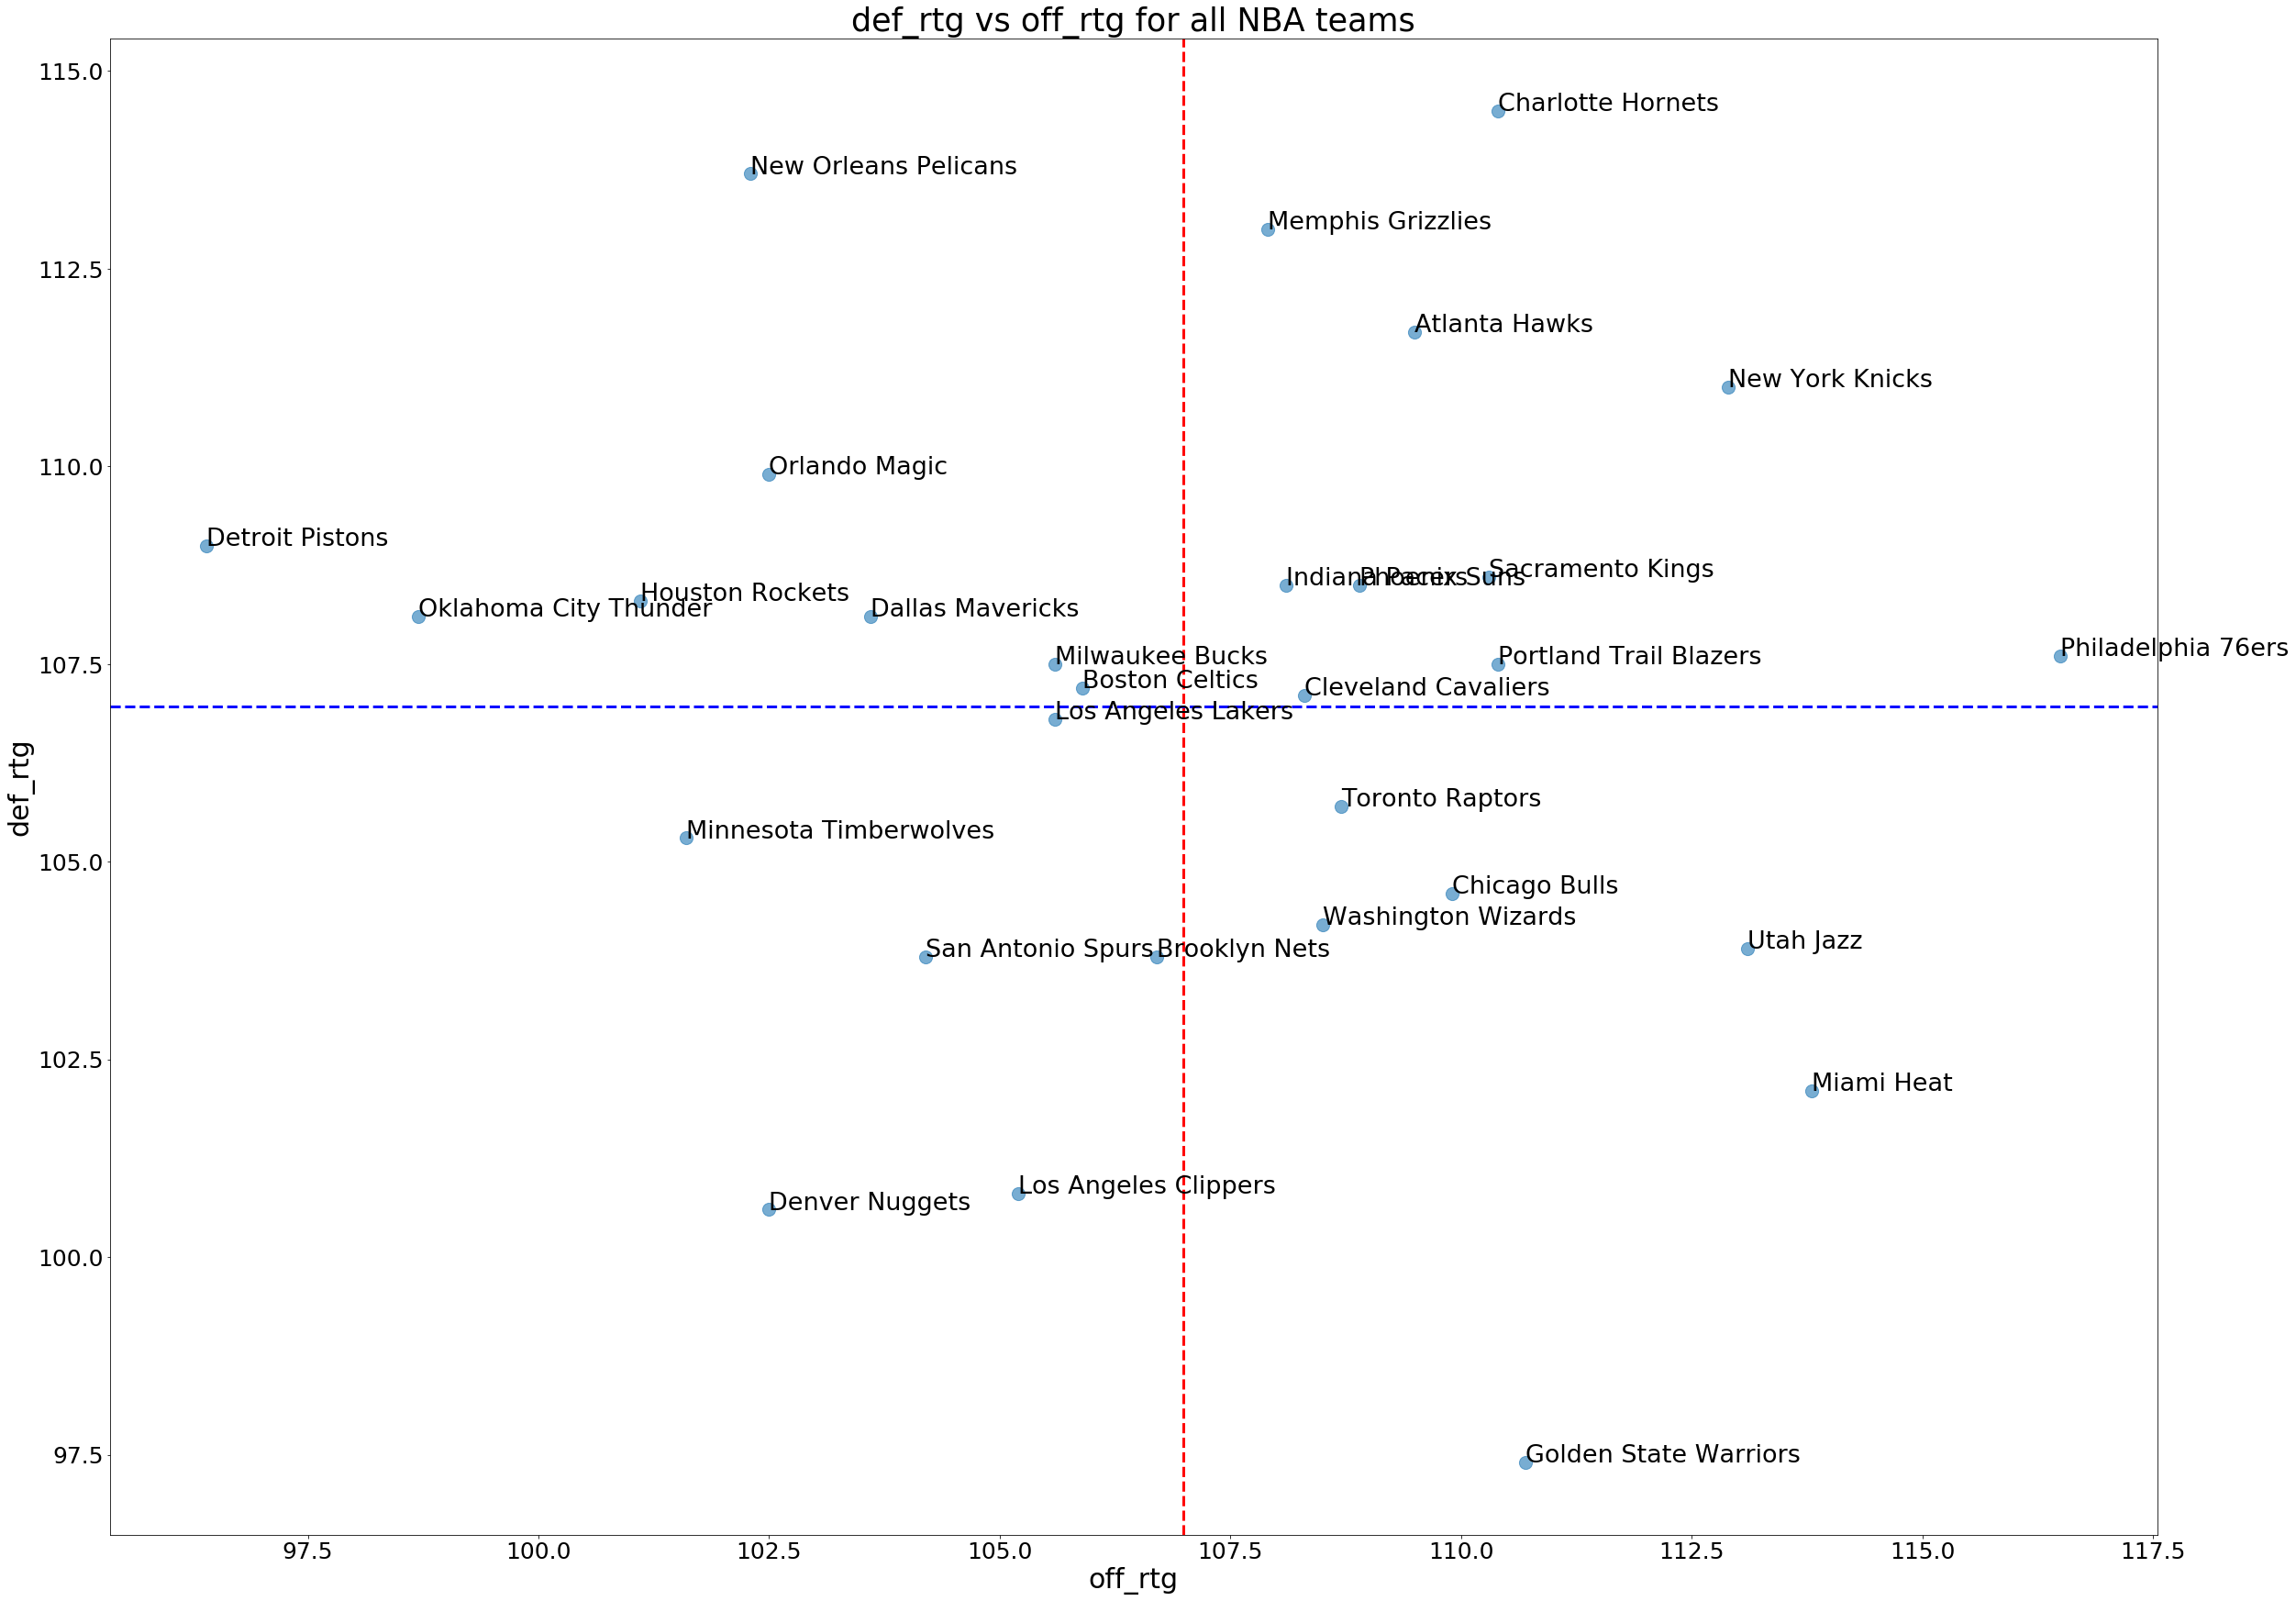

In [119]:
labeled_scatter('off_rtg', 'def_rtg')

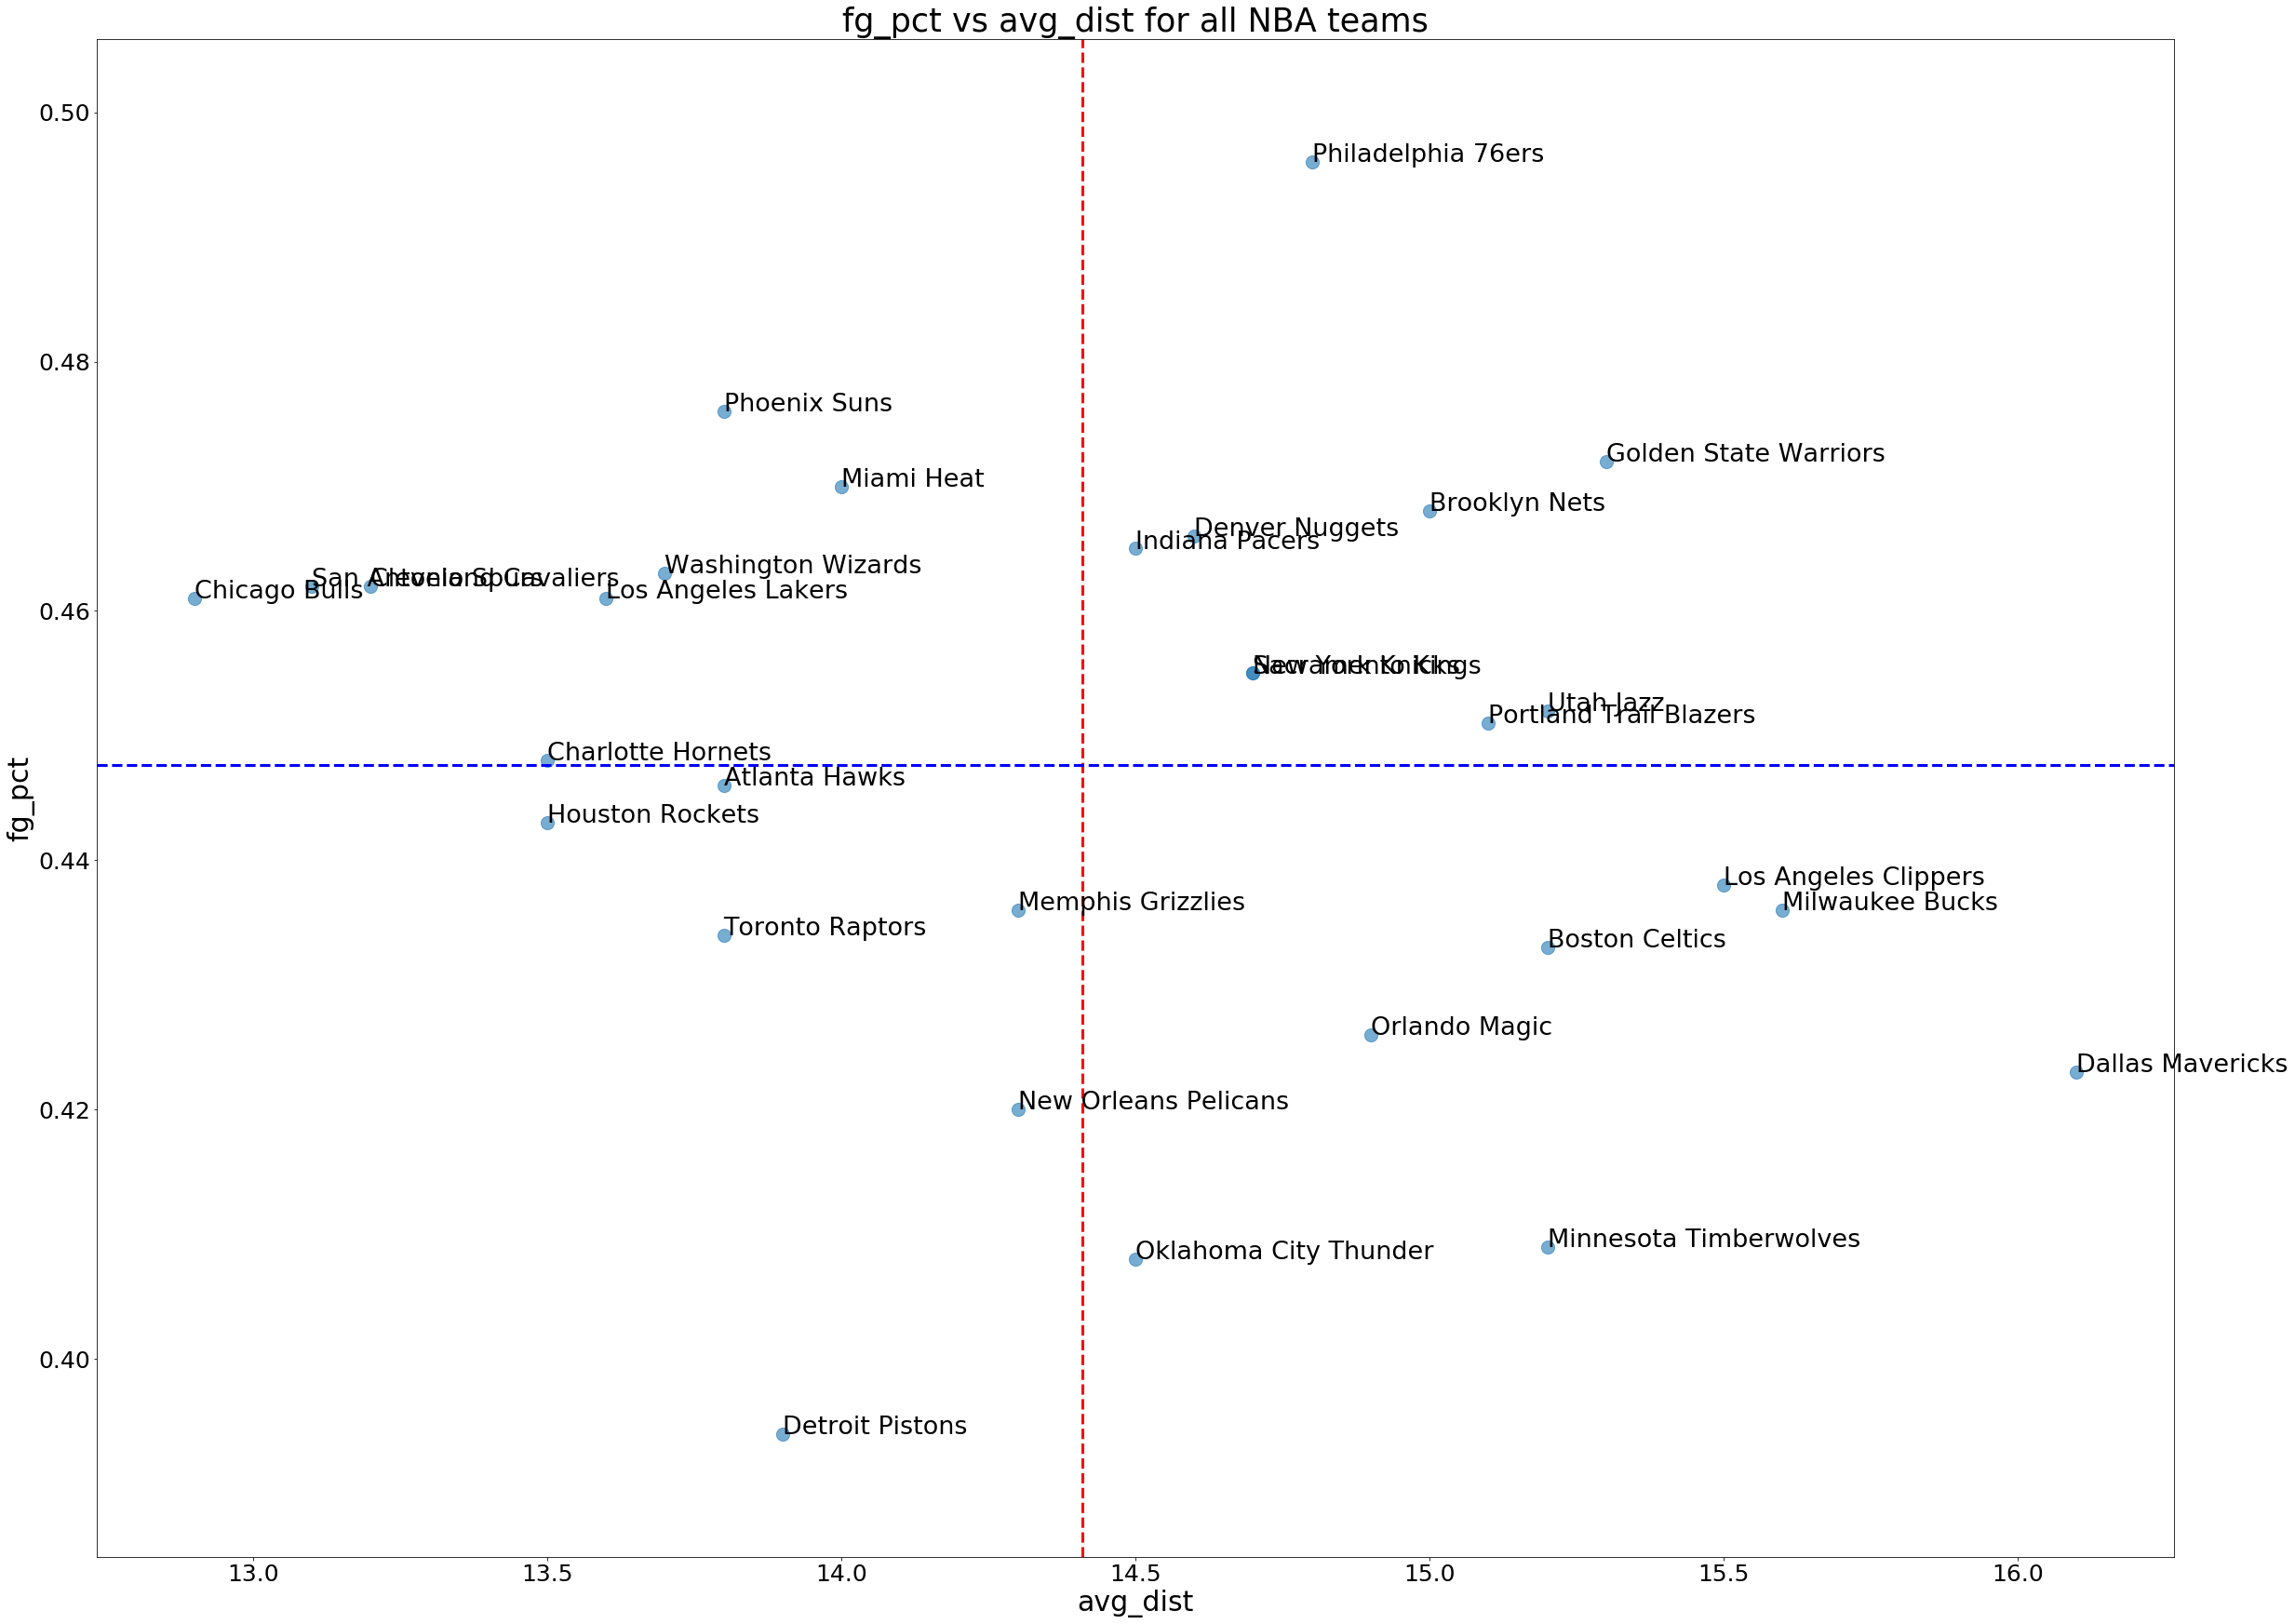

In [120]:
labeled_scatter('avg_dist', 'fg_pct')

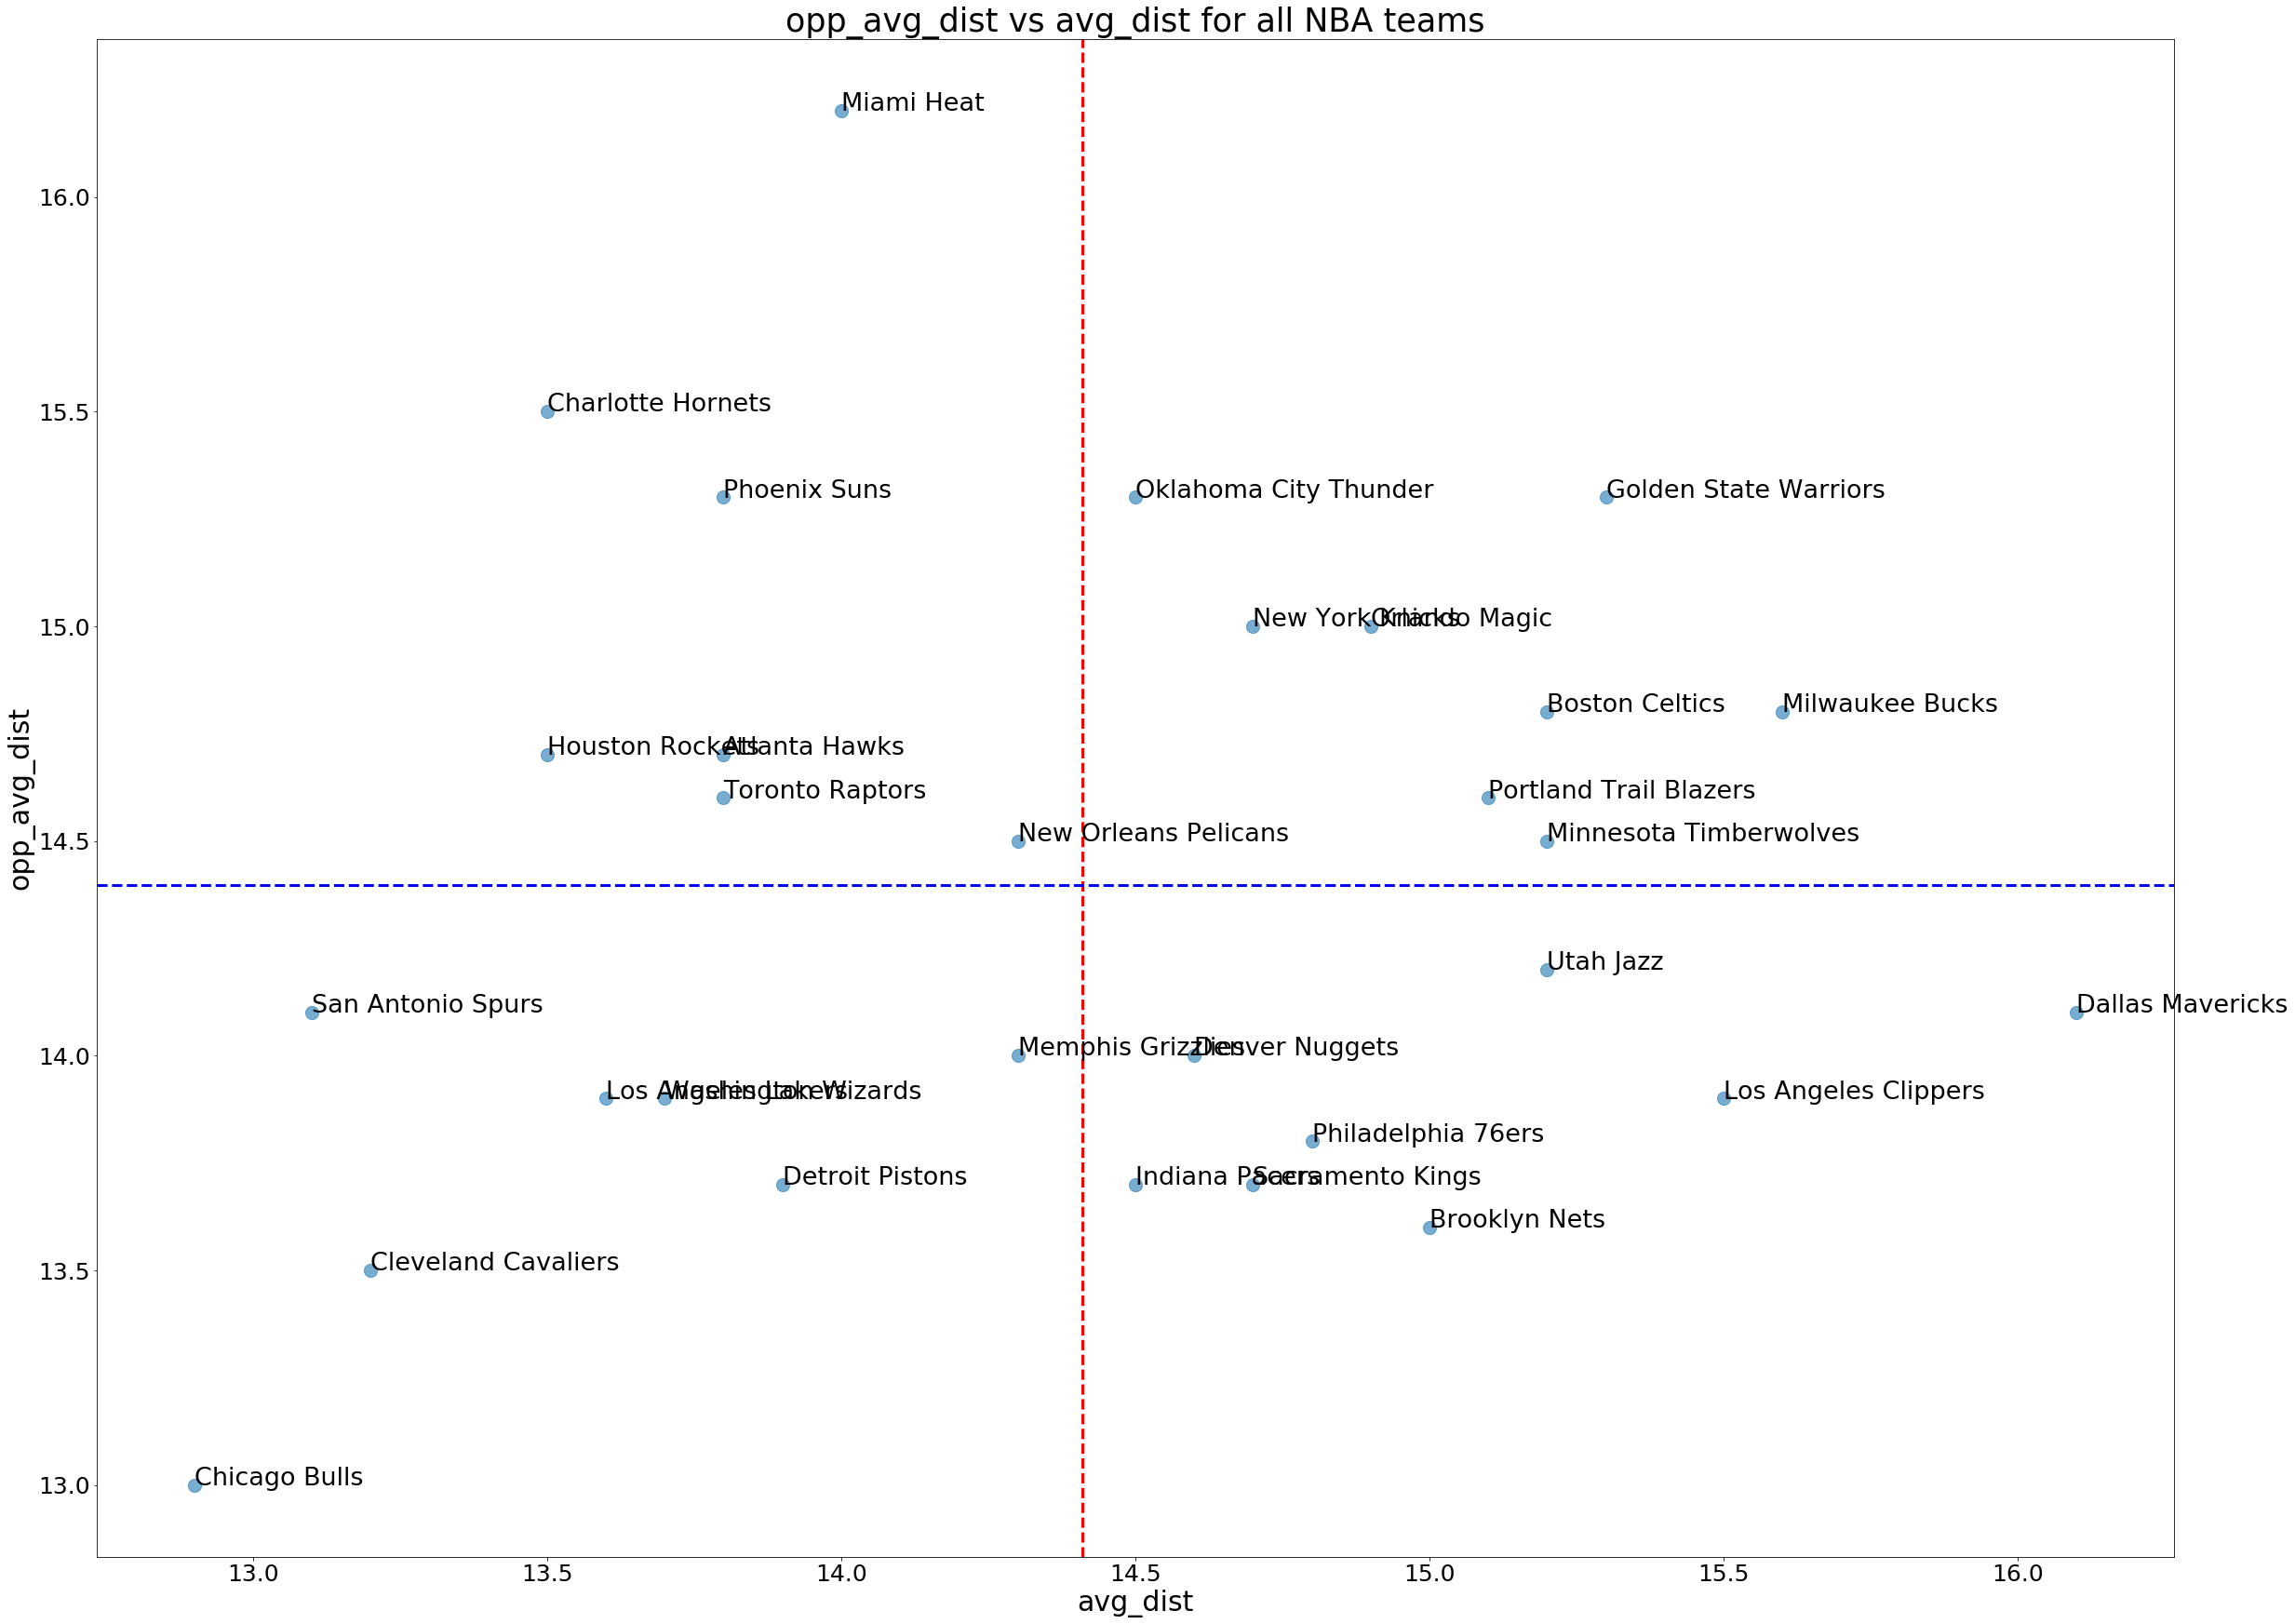

In [121]:
labeled_scatter('avg_dist', 'opp_avg_dist')

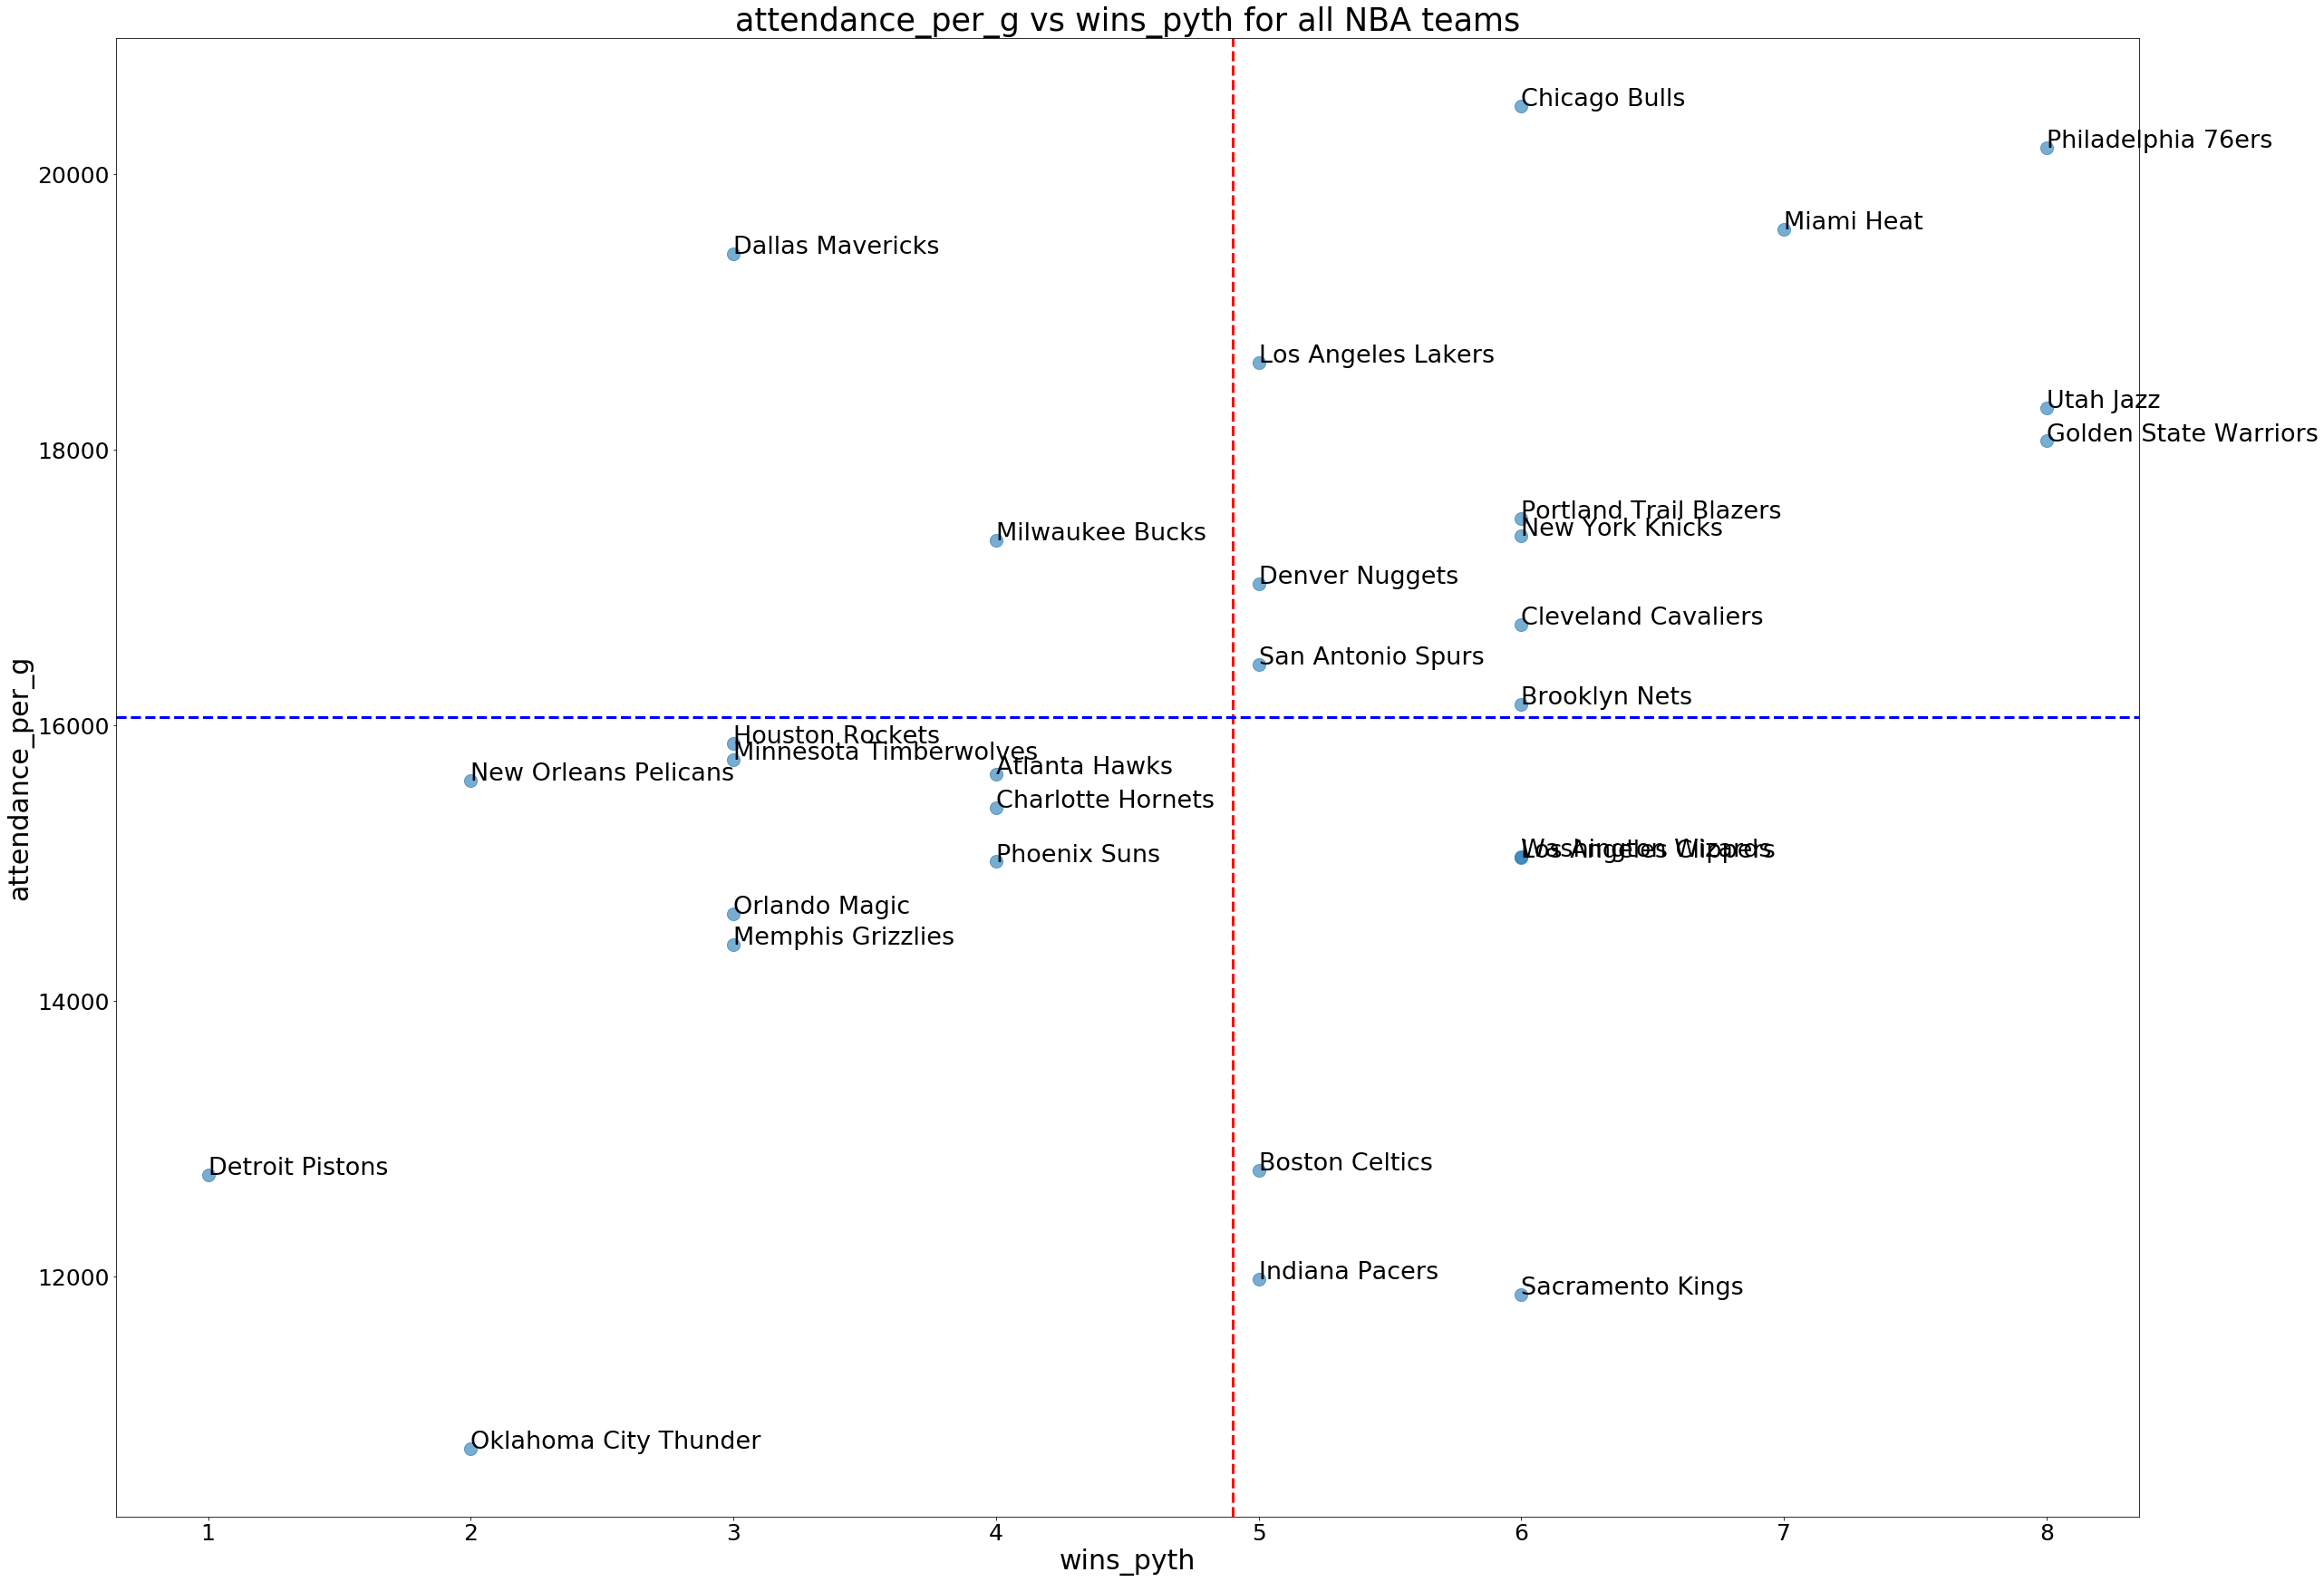

In [122]:
labeled_scatter('wins_pyth', 'attendance_per_g')

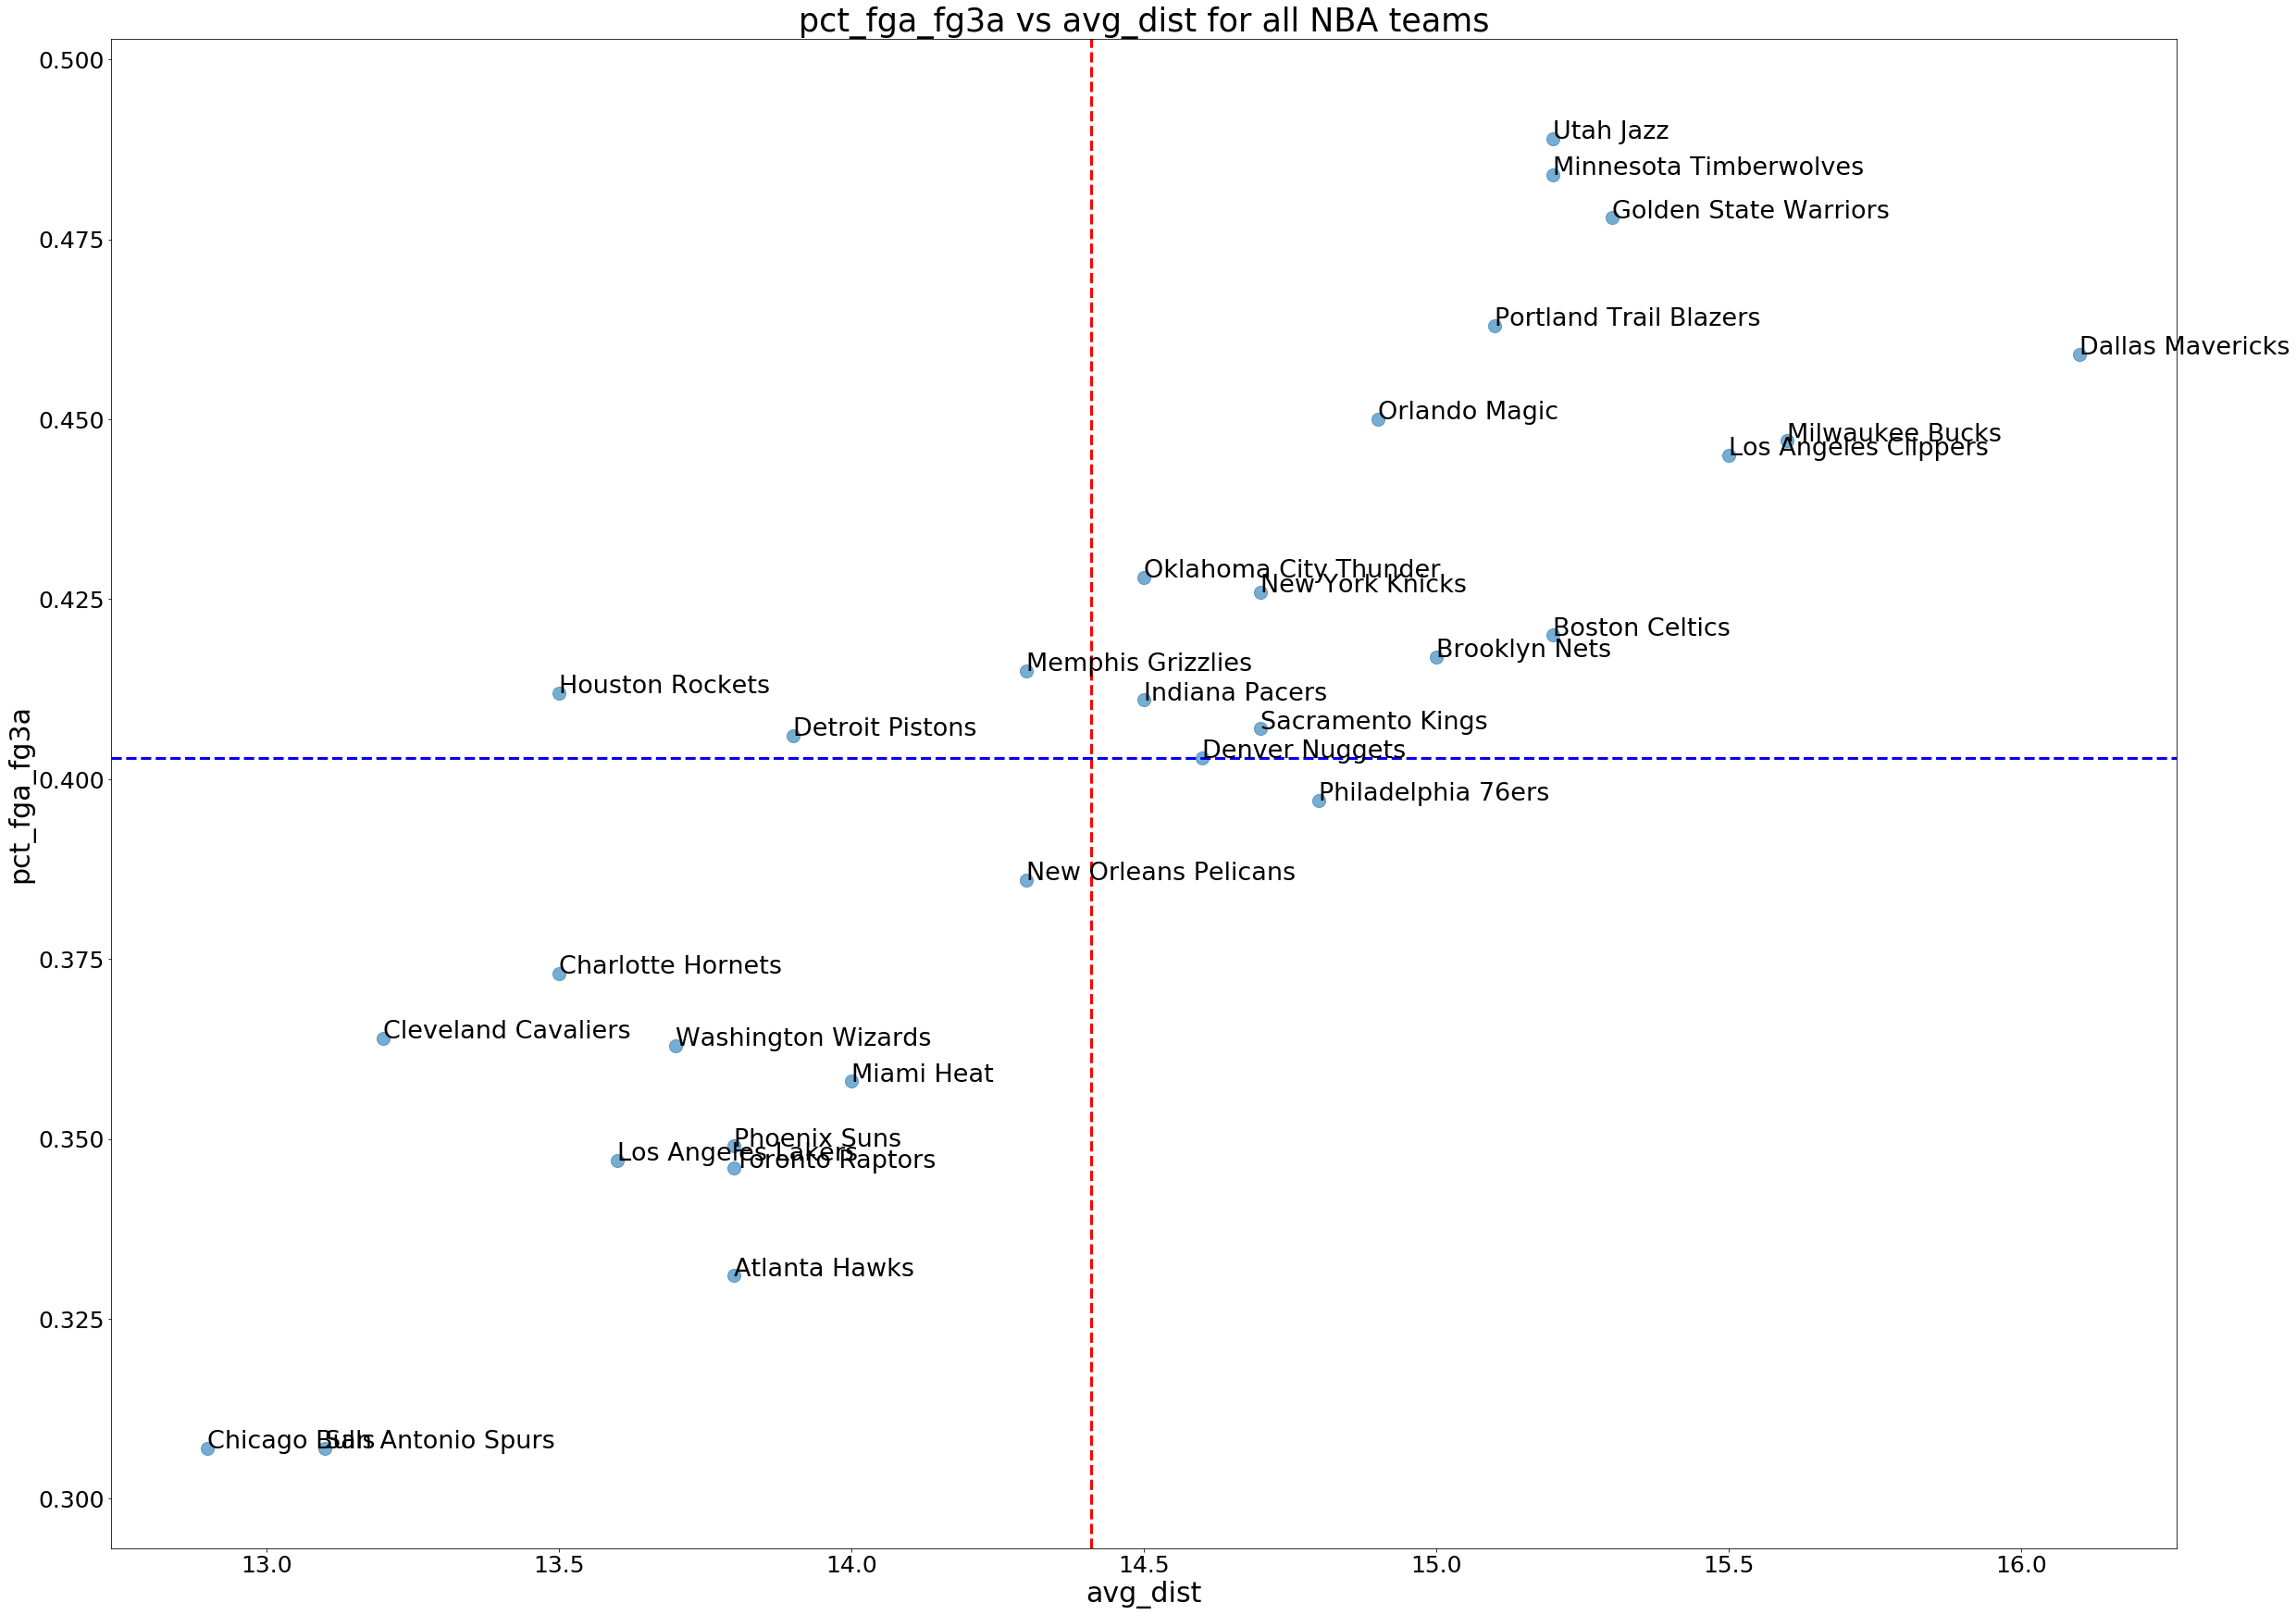

In [123]:
labeled_scatter('avg_dist', 'pct_fga_fg3a')